In [2]:
# setup
import os 
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
# load balanced diebetes binary dataset
url = "https://raw.githubusercontent.com/COGS118A/Group016-SP23/main/diabetes50.csv"
df = pd.read_csv(url)
diabetes=(df-df.min())/(df.max()-df.min())
diabetes



,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.50,0.166667,1.000000,0.0,1.0,0.250000,1.0,1.000000
1,0.0,1.0,1.0,1.0,0.162791,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.50,0.000000,0.000000,0.0,1.0,0.916667,1.0,1.000000
2,0.0,0.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.00,0.000000,0.333333,0.0,1.0,1.000000,1.0,1.000000
3,0.0,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.50,0.000000,0.100000,0.0,1.0,0.833333,1.0,1.000000
4,0.0,0.0,0.0,1.0,0.197674,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.000000,0.000000,0.0,0.0,0.583333,0.8,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,0.290698,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.75,0.000000,0.000000,0.0,0.0,0.416667,0.6,0.000000
70688,1.0,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.25,0.000000,0.000000,1.0,1.0,0.750000,0.4,0.714286
70689,1.0,1.0,1.0,1.0,0.151163,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.00,0.500000,0.000000,1.0,0.0,1.000000,1.0,0.428571
70690,1.0,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.75,0.000000,0.000000,1.0,0.0,0.833333,0.2,0.428571


In [5]:
# # train test split
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Diabetes_binary'], diabetes["Diabetes_binary"], test_size=0.33)
# # apply L2 norm on feature selection
# from sklearn.svm import LinearSVC
# from sklearn.feature_selection import SelectFromModel
# lsvc = LinearSVC(C=0.01, penalty="l2", dual=False, max_iter=10000).fit(X_train, y_train)
# model = SelectFromModel(lsvc, prefit=True)
# X_new = model.transform(X_train)
# X_train.shape, X_new.shape

# # assign feature names to selected feature set
# names = X_train.columns.values.tolist()
# feature_idx = model.get_support()
# filtered_list = [i for (i, v) in zip(names, feature_idx) if v]
# X_new = pd.DataFrame(data = X_new, columns = filtered_list).reset_index(drop=True)
# X_test = X_test[filtered_list]

# # print selected train set
# X_new

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_param_grid = {'n_estimators': [100, 200, 500], 'max_depth': [None, 5, 10]}
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=5, verbose=2)
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...................max_depth=None, n_estimators=100; total time=   5.0s
[CV] END ...................max_depth=None, n_estimators=100; total time=   5.7s
[CV] END ...................max_depth=None, n_estimators=100; total time=   4.8s
[CV] END ...................max_depth=None, n_estimators=100; total time=   4.7s
[CV] END ...................max_depth=None, n_estimators=100; total time=   5.6s
[CV] END ...................max_depth=None, n_estimators=200; total time=  11.2s
[CV] END ...................max_depth=None, n_estimators=200; total time=   9.7s
[CV] END ...................max_depth=None, n_estimators=200; total time=  10.0s
[CV] END ...................max_depth=None, n_estimators=200; total time=  10.3s
[CV] END ...................max_depth=None, n_estimators=200; total time=  10.3s
[CV] END ...................max_depth=None, n_estimators=500; total time=  25.7s
[CV] END ...................max_depth=None, n_est

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [ ]:
# Gradient Boosting
gb_clf = GradientBoostingClassifier(random_state=42)
gb_param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.05, 0.01]}
gb_grid_search = GridSearchCV(gb_clf, gb_param_grid, cv=5, verbose = 2)
gb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   7.0s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   4.4s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   4.2s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   5.1s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   4.2s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   9.2s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   8.2s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   9.2s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   9.2s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   8.8s
[CV] END ...............learning_rate=0.05, n_estimators=100; total time=   4.8s
[CV] END ...............learning_rate=0.05, n_est

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'n_estimators': [100, 200]},
             verbose=2)

In [ ]:
# Support Vector Machines
svm_clf = SVC(random_state=42)
svm_param_grid = {'C': [1, 10], 'kernel': ['linear', 'rbf']}
svm_grid_search = GridSearchCV(svm_clf, svm_param_grid, cv=5, verbose=2)
svm_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .................................C=1, kernel=linear; total time= 1.1min
[CV] END .................................C=1, kernel=linear; total time= 1.0min
[CV] END .................................C=1, kernel=linear; total time= 1.0min
[CV] END .................................C=1, kernel=linear; total time= 1.0min
[CV] END .................................C=1, kernel=linear; total time= 1.1min
[CV] END ....................................C=1, kernel=rbf; total time= 1.5min
[CV] END ....................................C=1, kernel=rbf; total time= 1.4min
[CV] END ....................................C=1, kernel=rbf; total time= 1.4min
[CV] END ....................................C=1, kernel=rbf; total time= 1.5min
[CV] END ....................................C=1, kernel=rbf; total time= 1.7min
[CV] END ................................C=10, kernel=linear; total time= 1.9min
[CV] END ................................C=10, ke

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf']}, verbose=2)

In [ ]:
# Logistic Regression
lr_clf = LogisticRegression(random_state=42)
lr_param_grid = {'C': [0.1, 1, 10]}
lr_grid_search = GridSearchCV(lr_clf, lr_param_grid, cv=5, verbose=2)
lr_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ..............................................C=0.1; total time=   0.3s
[CV] END ..............................................C=0.1; total time=   0.3s
[CV] END ..............................................C=0.1; total time=   0.3s
[CV] END ..............................................C=0.1; total time=   0.3s
[CV] END ..............................................C=0.1; total time=   0.3s
[CV] END ................................................C=1; total time=   0.3s
[CV] END ................................................C=1; total time=   0.3s
[CV] END ................................................C=1; total time=   0.3s
[CV] END ................................................C=1; total time=   0.3s
[CV] END ................................................C=1; total time=   0.4s
[CV] END ...............................................C=10; total time=   0.3s
[CV] END ........................................

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 1, 10]}, verbose=2)

In [ ]:
# Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Evaluate the models
rf_pred = rf_grid_search.predict(X_test)
gb_pred = gb_grid_search.predict(X_test)
svm_pred = svm_grid_search.predict(X_test)
lr_pred = lr_grid_search.predict(X_test)
nb_pred = nb_clf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)

rf_precision = precision_score(y_test, rf_pred)
gb_precision = precision_score(y_test, gb_pred)
svm_precision = precision_score(y_test, svm_pred)
lr_precision = precision_score(y_test, lr_pred)
nb_precision = precision_score(y_test, nb_pred)

rf_recall = recall_score(y_test, rf_pred)
gb_recall = recall_score(y_test, gb_pred)
svm_recall = recall_score(y_test, svm_pred)
lr_recall = recall_score(y_test, lr_pred)
nb_recall = recall_score(y_test, nb_pred)

rf_f1 = f1_score(y_test, rf_pred)
gb_f1 = f1_score(y_test, gb_pred)
svm_f1 = f1_score(y_test, svm_pred)
lr_f1 = f1_score(y_test, lr_pred)
nb_f1 = f1_score(y_test, nb_pred)

# Classification report

In [ ]:
# Select the best-performing algorithm
algorithm_scores = {'Random Forest': rf_f1, 'Gradient Boosting': gb_f1,
                    'Support Vector Machines': svm_f1, 'Logistic Regression': lr_f1, 'Naive Bayes': nb_f1}

best_algorithm = max(algorithm_scores, key=algorithm_scores.get)
print("Best Algorithm:", best_algorithm)

# print the performance metrics of all algorithms
algorithm_metrics = {
    'Random Forest': (rf_accuracy, rf_precision, rf_recall, rf_f1),
    'Gradient Boosting': (gb_accuracy, gb_precision, gb_recall, gb_f1),
    'Support Vector Machines': (svm_accuracy, svm_precision, svm_recall, svm_f1),
    'Logistic Regression': (lr_accuracy, lr_precision, lr_recall, lr_f1),
    'Naive Bayes': (nb_accuracy, nb_precision, nb_recall, nb_f1)
}

for algorithm, (accuracy, precision, recall, f1) in algorithm_metrics.items():
    print(algorithm)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("-----------")

Best Algorithm: Gradient Boosting
Random Forest
Accuracy: 0.751768185520168
Precision: 0.7273153942428036
Recall: 0.8013444798758942
F1 Score: 0.7625374174765245
-----------
Gradient Boosting
Accuracy: 0.7549402031805906
Precision: 0.7306426332288402
Recall: 0.803499095061622
F1 Score: 0.7653408857694045
-----------
Support Vector Machines
Accuracy: 0.7516395902096104
Precision: 0.728108065656169
Recall: 0.7990174954753081
F1 Score: 0.7619165023011177
-----------
Logistic Regression
Accuracy: 0.750053581379399
Precision: 0.7373355263157895
Recall: 0.7727311902094286
F1 Score: 0.7546185245970627
-----------
Naive Bayes
Accuracy: 0.7164473402203266
Precision: 0.7181213923386391
Recall: 0.7076618116004482
F1 Score: 0.7128532360984503
-----------


### Confusion Matrix

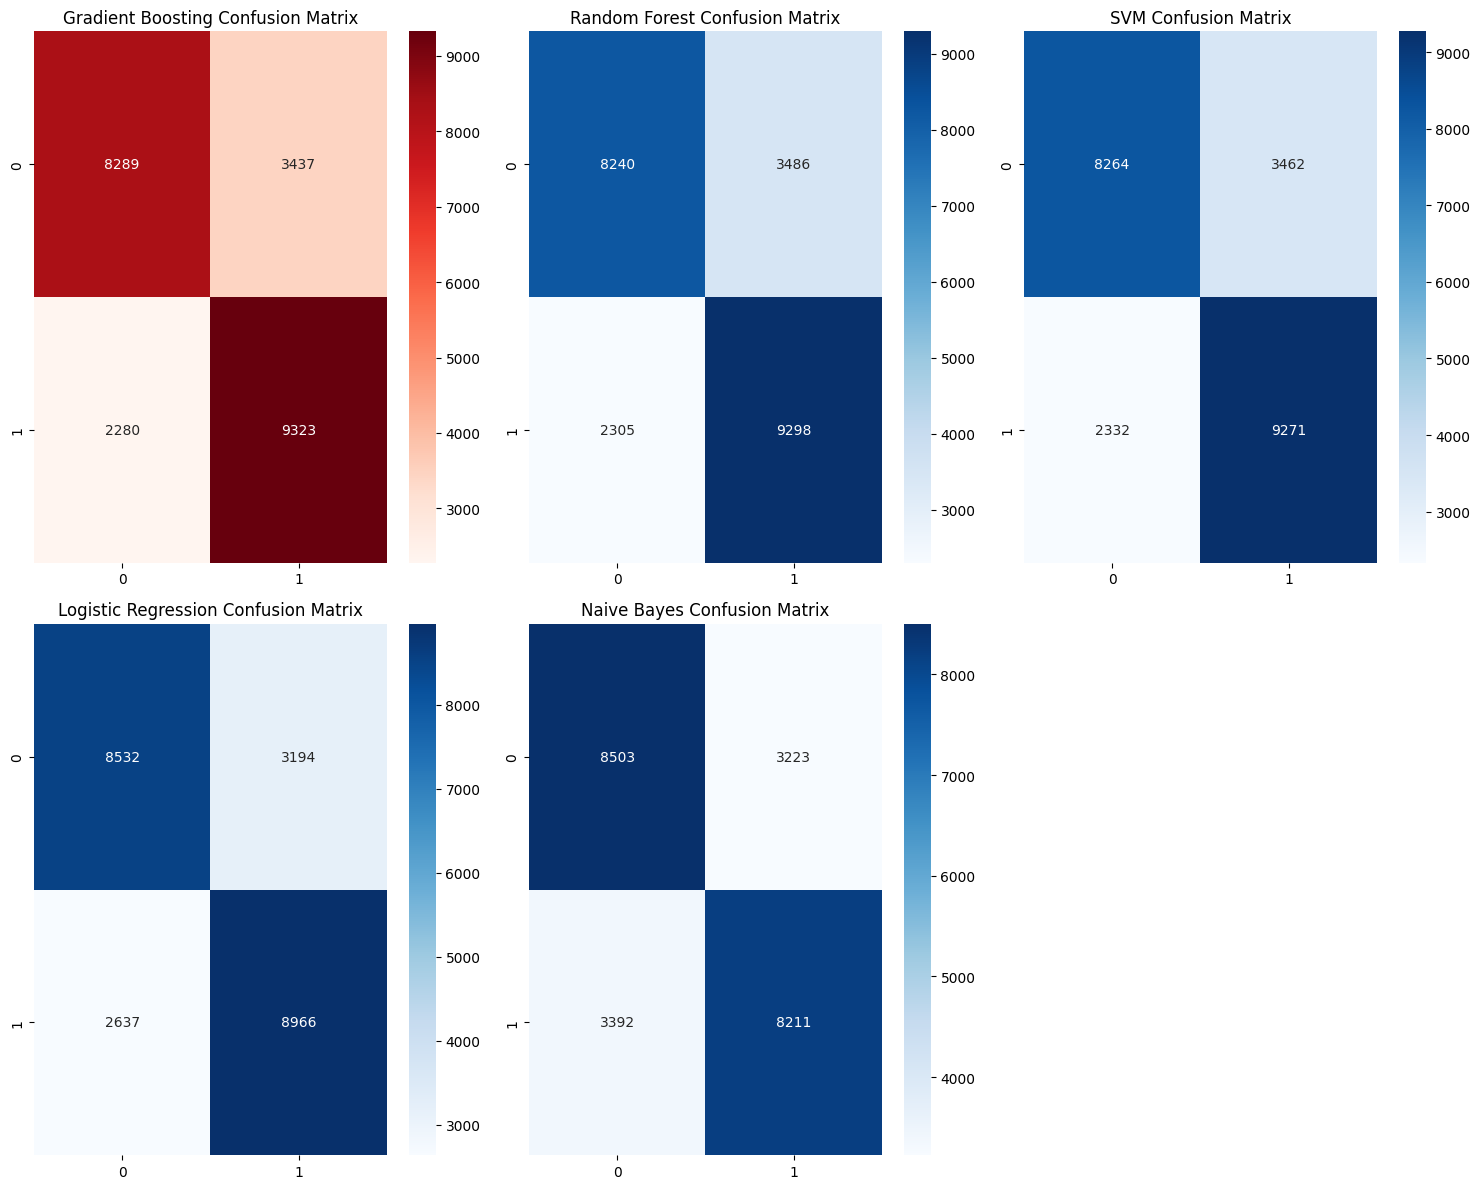

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
rf_cm = confusion_matrix(y_test, rf_pred)
gb_cm = confusion_matrix(y_test, gb_pred)
svm_cm = confusion_matrix(y_test, svm_pred)
lr_cm = confusion_matrix(y_test, lr_pred)
nb_cm = confusion_matrix(y_test, nb_pred)

# Plot confusion matrices
plt.figure(figsize=(15, 12))

plt.subplot(2, 3, 1)
sns.heatmap(gb_cm, annot=True, fmt="d", cmap="Reds")
plt.title("Gradient Boosting Confusion Matrix")

plt.subplot(2, 3, 2)
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")

plt.subplot(2, 3, 3)
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix")

plt.subplot(2, 3, 4)
sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")

plt.subplot(2, 3, 5)
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Naive Bayes Confusion Matrix")

plt.tight_layout()
plt.show()

# Feature Importance

We can use the Random Forest model that we created to estimate feature importance.

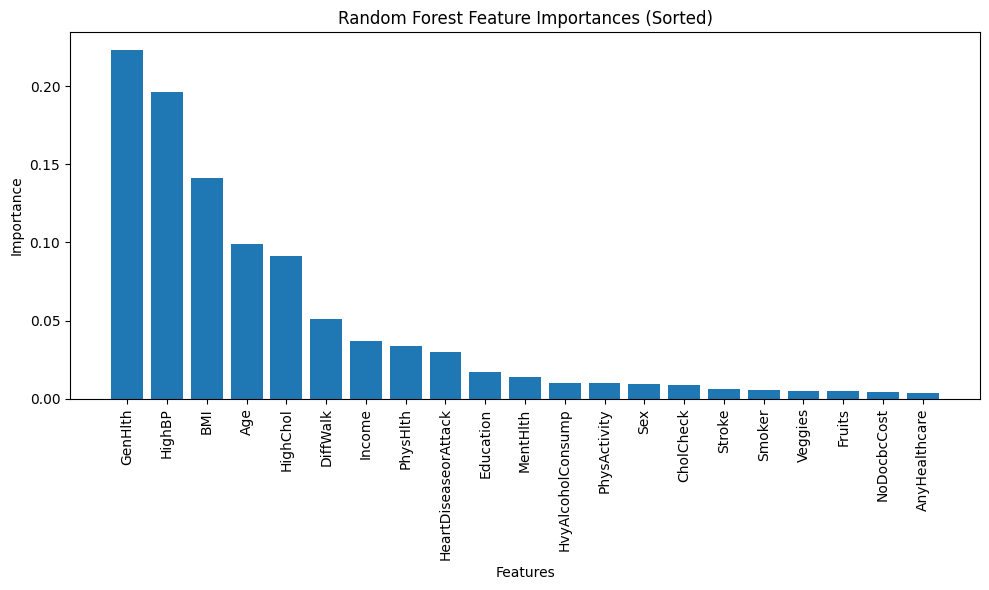

In [ ]:
importances = rf_grid_search.best_estimator_.feature_importances_
feature_names = X_train.columns

importance_indices = np.argsort(importances)[::-1]
sorted_importances = importances[importance_indices]
sorted_feature_names = feature_names[importance_indices]

# Create a graph
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation='vertical')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importances (Sorted)")
plt.tight_layout()
plt.show()